## Now let's practice what we have learnt by trying out the following excercise!
Remeber, Google and Stackoverflow are your friends!

### <span style="color: red"> Task 1:</span> The text file you downloaded earlier ('E1_T1.csv') contains ten words. Read the words into a list and use a "for loop" to print out each word. Also print the words as a full sentence (i.e., a single string), as well as the data type of the sentence.

### <span style="color: blue"> Solution:</span>

In [ ]:
import csv
with open('E1_T1.csv') as csvfile:
# Simulate reading from a CSV file
    csv_reader = csv.reader(csvfile)

    # Read the row from the CSV
    for row in csv_reader:
        # Join the words into a single sentence and remove unwanted characters
        sentence = ' '.join(row)
        print(sentence)
        for word in sentence.split(): print(word)
        print(type(sentence))

This task is too simple , I want more challenges
This
task
is
too
simple
,
I
want
more
challenges
<class 'str'>


### <span style="color: red"> Task 2:</span> Create a function that finds the largest number in a list. Don not use built-in function. Show you function by using a random number generator to create the inputs.

### <span style="color: blue"> Solution:</span>

In [ ]:
from math import inf
def max_list(a:list)->int:
    maximum = -inf
    for element in a:
        if element>maximum:
            maximum = element
    return maximum
import random

def generate_random_numbers(count, start, end):
    return [random.randint(start, end) for _ in range(count)]

# Example usage: generate a list of 10 random numbers between 1 and 100
random_numbers = generate_random_numbers(100, 1, 100)
print(max_list(random_numbers))


100


### <span style="color: red"> Task 3:</span> Create a class named "Alloys". Initilize it with name and number of elements. In class "Alloys", write a method named "info", which prints "\<name> has \<num_of_elements> elements". For example, for Ti6Al4V, it will print "Ti6Al4V has 3 elements". Then create an inheritance calss of "Alloys" called "HEAs" (that's High Entropy Alloys). Create an instance from HEAs and print it's info. You can use CoCrFeMnNi, which has 5 elements.

### <span style="color: blue"> Solution:</span>

In [ ]:
class Alloys:
    def __init__(self,name:str=None,numel:int=None,compositon:list[int]=None) -> None:
        self.name = name
        self.numel = numel
        self.composition = compositon

    def info(self):
        print(self.name,' has ',self.numel,'elements')

class HEAs(Alloys):
    def __init__(self, name: str, numel: int) -> None:
        super().__init__(name, numel)

ccfmn = HEAs('CoCrFeMnNi',5)
ccfmn.info()



CoCrFeMnNi  has  5 elements


### <span style="color: red"> Task 4:</span> Write a function to check if an alloy’s composition is normalized. If it is not, your function should normalize it and return the normalized alloy name. E.g., if the input is $A_{1}B_{2}C_{3}$, your function should output A0.17B0.33C0.5.
Bonus question: your function can run a check on the input name to check if there is any “not elements” in the name. Hint: you can try the Mendeleev python library for a complete list of elements.

### <span style="color: blue"> Solution:</span>

In [ ]:
def check_normalized(alloy:Alloys)->str:
    if sum(alloy.composition) != 1:
        total = sum(alloy.composition)
        print('it is not normalized, normalized value:',alloy.name,[i/total for i in alloy.composition])
    else:
        print('it is normalized')

abc = Alloys('abc',3,[1,2,3])
check_normalized(abc)

it is not normalized, normalized value: abc [0.16666666666666666, 0.3333333333333333, 0.5]


### <span style="color: red"> Task 5:</span> Some errors are presented in the code below. Can you identify and corret them?

In [ ]:
import os
import csv

current_dir = os.getcwd()
filename = current_dir+'\E1_T1.csv'
with open(filename, 'r') as f:
    csv_file = csv.reader(f)
    data = list(csv_file)
sentence=''
for word in data:
    sentence = sentence + ' '.join(word)#string can not add with list
print(sentence)
print(type(sentence))

This task is too simple , I want more challenges
<class 'str'>


<>:5: SyntaxWarning: invalid escape sequence '\E'
<>:5: SyntaxWarning: invalid escape sequence '\E'
C:\Users\yxh99\AppData\Local\Temp\ipykernel_9852\2432689810.py:5: SyntaxWarning: invalid escape sequence '\E'
  filename = current_dir+'\E1_T1.csv'


### <span style="color: red"> Task 6:</span> Who has the most runner-up (i.e., second place) finishes in the histroy of NHL? Create a table with the teams and their runner-up finishes. The table must contain the the following columns:

-Team

-Total number of runner-up finishes

-Years [list of the years they finished as a runner-up]

You have to use Jupyter for the practice and produce a notebook with good readability. Data stored in 'Stanely_cup_winners_by_year.xlsx'.

### <span style="color: blue"> Solution:</span>

In [2]:
import pandas as pd

# Load the Excel file
file_path = '/content/Stanely_cup_winners_by_year.xlsx'
df = pd.read_excel(file_path)

# Group by Runner up team and aggregate the years
runner_up_data = df.groupby('Runner up').agg(
    total_runner_up_finishes=('Year', 'count'),
    years=('Year', lambda x: list(x))
).reset_index()

# Rename columns for clarity
runner_up_data.columns = ['Team', 'Total number of runner-up finishes', 'Years']

# Display the table
print(runner_up_data)


                       Team  Total number of runner-up finishes  \
0             Boston Bruins                                  14   
1            Buffalo Sabres                                   2   
2            Calgary Flames                                   2   
3            Calgary Tigers                                   1   
4       Carolina Hurricanes                                   1   
5       Chicago Black Hawks                                   1   
6        Chicago Blackhawks                                   6   
7              Dallas Stars                                   2   
8         Detroit Red Wings                                  13   
9          Edmonton Eskimos                                   1   
10          Edmonton Oilers                                   2   
11         Florida Panthers                                   1   
12        Los Angeles Kings                                   1   
13  Mighty Ducks of Anaheim                                   

### <span style="color: red"> Task 7:</span> With the help of matminer, 1. Retrive the 'steel_strength' dataset into a dataframe and clean your dataset (i.e., do some basic data exploration and analysis work on your data. For instance, check the statistics of the dataset, check for NaNs, drop duplicated data entries etc. It is alway the first thing to do before you start working on a dataset.) if needed; 2. Featurize the compositions of the materials; and 3. Perform correlation analysis and drop feature(s) with a coefficient greater than abs(0.8) from your dataframe.

### <span style="color: blue"> Solution:</span>

ElementProperty: 100%|██████████| 312/312 [00:12<00:00, 24.76it/s]


0        (Fe, C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al, Ti)
1      (Fe, C, Mn, Si, Cr, Ni, Mo, V, N, Nb, Co, W, Al)
3        (Fe, C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al, Ti)
4        (Fe, C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al, Ti)
5            (Fe, C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al)
                             ...                       
307          (Fe, C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al)
308         (Fe, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al, Ti)
309          (Fe, C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al)
310          (Fe, C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al)
311          (Fe, C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al)
Name: composition, Length: 303, dtype: object


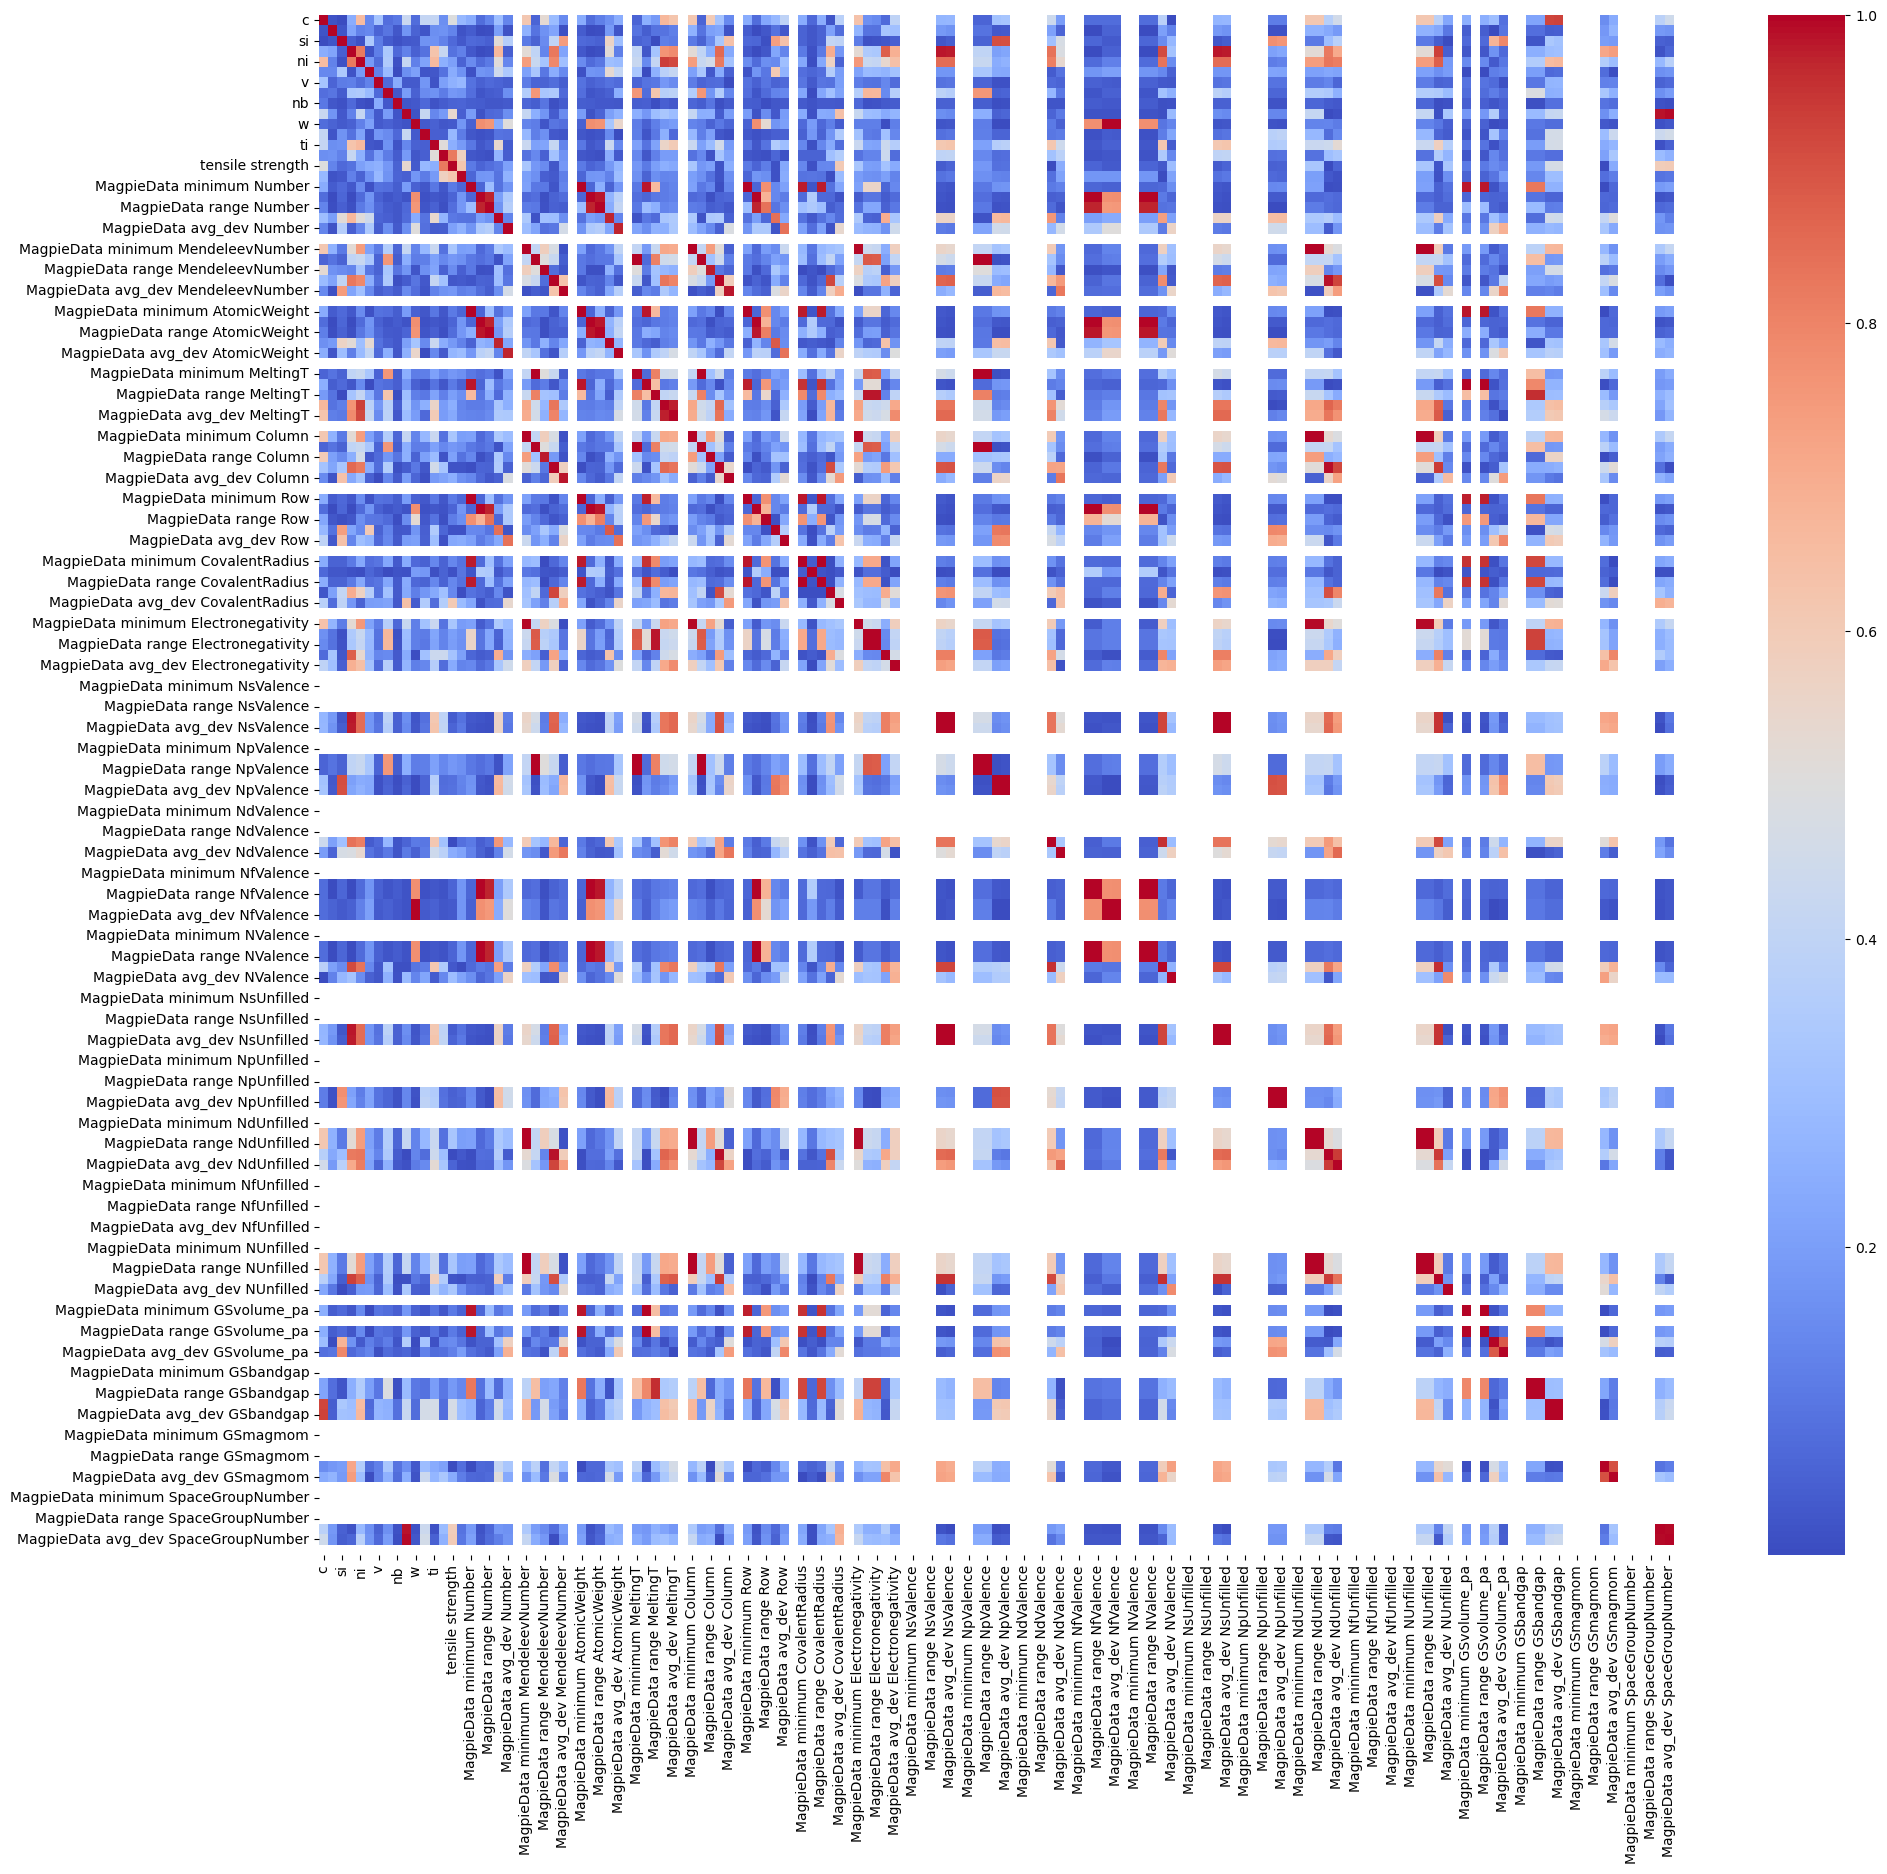

   MagpieData mode Number  MagpieData mode MendeleevNumber  \
0                    26.0                             55.0   
1                    26.0                             55.0   
3                    26.0                             55.0   
4                    26.0                             55.0   
5                    26.0                             55.0   

   MagpieData mode AtomicWeight  MagpieData mode MeltingT  \
0                        55.845                    1811.0   
1                        55.845                    1811.0   
3                        55.845                    1811.0   
4                        55.845                    1811.0   
5                        55.845                    1811.0   

   MagpieData mode Column  MagpieData mode Row  \
0                     8.0                  4.0   
1                     8.0                  4.0   
3                     8.0                  4.0   
4                     8.0                  4.0   
5         

In [8]:
import pandas as pd
from matminer.datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Retrieve the 'steel_strength' dataset
df = load_dataset('steel_strength')
# del df['formula']
# Basic data exploration and cleaning
# print(df.describe())  # Check statistics
# print(df.info())  # Check for NaNs and data types
from pymatgen.core import Composition
from matminer.featurizers.composition.composite import ElementProperty

df['composition'] = df['formula'].apply(lambda x: Composition(x))

feat = ElementProperty.from_preset('magpie')
df = feat.featurize_dataframe(df, 'composition')
# print(ElementProperty(df,features='composition'))
# data.head()
# Drop duplicated data entries
df = df.drop_duplicates()

# Drop rows with NaN values
df = df.dropna()
print(df['composition'])
# Step 2: Perform correlation analysis
# Calculate the correlation matrix
del df['formula'],df['composition']
corr_matrix = df.corr().abs()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(22, 20))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

# Identify features with correlation coefficient greater than 0.8
high_corr_features = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.8) and column != 'strength']

# Drop highly correlated features
df = df.drop(columns=high_corr_features)

# Display the cleaned dataframe
print(df.head())
